# DASC 512 - 20 - Sample Size and Power

***

In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Note this is a new addition
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

*Below allows plotting of two sampling distributions based on given mean/std of null and alternative hypothesis values*

In [12]:
# Plot of two-sided test distributions with alpha and beta
def plot_confidence_power(mu0=5, sigma=1, delta=1, n=10, alpha=.05):
    '''
    Plots the t sampling distribution for the null and alternative hypothesis 
    assuming a specific delta. Calculates and plots alpha and beta.

    Inputs
    mu0    : the hypothesized mean (H0)
    sigma  : the assumed population standard deviation
    delta  : the deviation from mu0 being considered
    n      : the sample size
    alpha  : the significance level

    Outputs
    fig    : the figure generated
    ax     : the axis in the figure
    '''
    mu2 = mu0 + delta
    sigma2 = sigma

    sem1 = sigma / np.sqrt(n)
    sem2 = sigma2 / np.sqrt(n)
    dist1 = stats.t(loc=mu0, scale=sem1, df=n-1)
    dist2 = stats.t(loc=mu2, scale=sem2, df=n-1)

    pdf_x = np.linspace(start=min(mu0,mu2)-4*max(sem1,sem2), 
                        stop=max(mu0,mu2)+4*max(sem1,sem2), 
                        num=1000)  
    pdf1 = [(dist1.pdf(x=x)) for x in pdf_x]
    pdf2 = [(dist2.pdf(x=x)) for x in pdf_x]

    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot(pdf_x, pdf1, label=f'N$(\mu={mu0}, \sigma ={sigma})$')
    ax.plot(pdf_x, pdf2, label=f'N$(\mu={mu2}, \sigma ={sigma2})$')

    # Plot alpha area
    fill_alpha_left = np.linspace(start=pdf_x[0], 
                                  stop=dist1.ppf(alpha/2), 
                                  num=1000)
    fill_left = [(dist1.pdf(x=x)) for x in fill_alpha_left]
    ax.fill_between(x=fill_alpha_left, 
                    y1=0, 
                    y2=fill_left, 
                    color='C0', 
                    alpha=0.3, 
                    label=r'$\alpha = $'+f'{alpha:.2f}')
    fill_alpha_right = np.linspace(start=dist1.ppf(1-alpha/2), 
                                   stop=pdf_x[999], 
                                   num=1000)
    fill_right = [(dist1.pdf(x=x)) for x in fill_alpha_right]
    ax.fill_between(x=fill_alpha_right, 
                    y1=0, 
                    y2=fill_right, 
                    color='C0', 
                    alpha=0.3)

    # Plot beta area
    fill_beta_x = np.linspace(start=dist1.ppf(alpha/2), 
                              stop=dist1.ppf(1-alpha/2), 
                              num=1000)
    fill_beta = [(dist2.pdf(x=x)) for x in fill_beta_x]
    beta = dist2.cdf(x=dist1.ppf(1-alpha/2)) - dist2.cdf(x=dist1.ppf(alpha/2))
    ax.fill_between(x=fill_beta_x, 
                    y1=0, 
                    y2=fill_beta, 
                    color='C1', 
                    alpha=0.3, 
                    label=r'$\beta = $' + f'{beta:.3f}')

    # Reference lines if desired for comparison (from building slides)
    # ax.axvline(x=stats.t.ppf(q=0.975, loc=5, scale=1/np.sqrt(5), df=4), color='red', linestyle='--')
    # ax.axvline(x=stats.t.ppf(q=0.975, loc=5, scale=1/np.sqrt(10), df=9), color='orange', linestyle='--')
    # ax.axvline(x=stats.t.ppf(q=0.975, loc=5, scale=1/np.sqrt(16), df=15), color='green', linestyle='--')

    # Tweak graphic
    ax.set_title(r'Two sampling distributions ($t$) showing $\alpha$ and $\beta$ for $n = $'+f'{n}')
    ax.set_ylabel('pdf')
    ax.set_xlabel('x')
    ax.set_xlim(pdf_x[0],pdf_x[999])
    ax.legend(bbox_to_anchor=(1.1,1))
    fig.tight_layout()
    return fig, ax



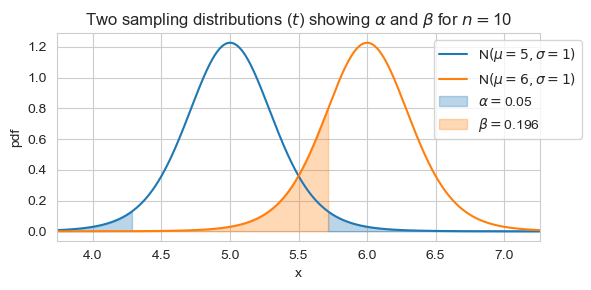

In [13]:
fig, ax = plot_confidence_power()
plt.show()

In [15]:
effect_size = 1  # delta
nobs = None  # n. Setting a value to None lets it solve for that value. This is the default value.
alpha = 0.05  # Significance
pwr = 0.95  # 1 - beta (renamed to not overload the variable 'power')
sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=pwr, alternative='two-sided')
# Alternative may also be 'larger' or 'smaller'. Choose wisely. For positive delta, 'smaller' will fail and vice versa.

15.063090384408381

Note that you always round up for sample size. You can't sample part of an experimental unit!

Also, statsmodels.stats has a function for two-sample z-tests but not one-sample. Set ratio=0 to make it one-sample.

In [16]:
sms.zt_ind_solve_power(effect_size=effect_size, nobs1=nobs, alpha=alpha, power=pwr, ratio=0, alternative='two-sided')

12.994709103169528

Note also that power is well-defined for parametric tests but not non-parametric tests. It can be estimated by Monte Carlo simulation or other numerical methods, but we won't cover that in this class.